<a href="https://colab.research.google.com/github/jamarju/demo_orla/blob/master/03_entrena_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones

In [1]:
!pip install -U fastai

     |████████████████████████████████| 194kB 6.2MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 210kB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%time
!unzip -q /content/drive/MyDrive/demo_orla/crops.zip

CPU times: user 1.04 s, sys: 128 ms, total: 1.16 s
Wall time: 4min 20s


In [4]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.distributed import *
from pathlib import Path

In [5]:
data_dir = Path('crops')

In [6]:
data_dir.ls()

(#2) [Path('crops/train'),Path('crops/valid')]

In [7]:
%%time
dls = ImageDataLoaders.from_folder(
    data_dir,
    item_tfms=Resize(128),
    bs=128,
    num_workers=2,
)

CPU times: user 1min 5s, sys: 1.26 s, total: 1min 6s
Wall time: 1min 14s


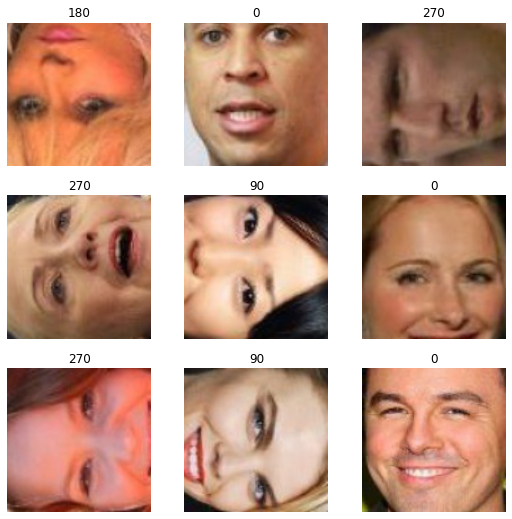

In [8]:
dls.show_batch()

In [9]:
%%time
learn = cnn_learner(dls, resnet18, metrics=error_rate, path='.').to_fp16().to_parallel()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



CPU times: user 494 ms, sys: 168 ms, total: 662 ms
Wall time: 1.33 s


# Entrenamiento

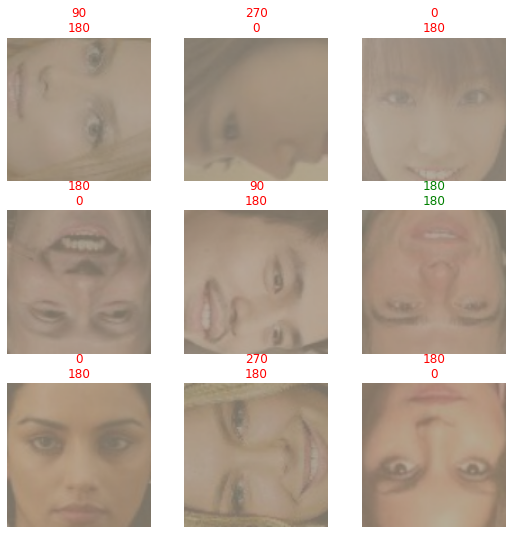

In [10]:
learn.show_results()

In [11]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.019675,0.202303,0.081482,28:02


epoch,train_loss,valid_loss,error_rate,time
0,0.001755,0.006386,0.001956,28:32
1,0.000995,0.005404,0.001784,28:21
2,0.002054,0.002582,0.000790,28:16
3,0.000629,0.001080,0.000333,28:15
4,0.000348,0.001235,0.000364,28:11


In [ ]:
learn.export('tiltnet18.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
learn.show_results()